# Link Prediction Task and Features
[Course Video](https://youtu.be/4dVwlE9jYxY?list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn)

## Link-level Prediction Tasks
![](figures/02-tradition-ml_28.jpeg)
![](figures/02-tradition-ml_29.jpeg)
![](figures/02-tradition-ml_30.jpeg)

## Link-level Features
### Overview
![](figures/02-tradition-ml_31.jpeg)

### Distance-Based Features
![](figures/02-tradition-ml_32.jpeg)

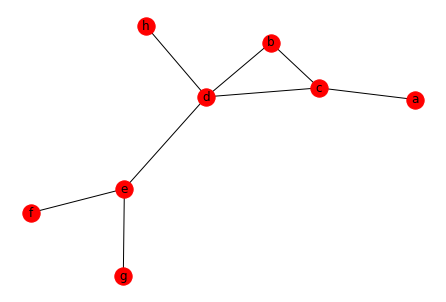

In [5]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["a","b","c","d","e","f","g","h"])
G.add_edges_from([("a", "c"),
                  ("b", "c"),
                  ("b", "d"),
                  ("c", "d"),
                  ("d", "e"),
                  ("d", "h"),
                  ("e", "f"),
                  ("e", "g"),
                 ])
nx.draw(G, with_labels=True, node_color="r")

In [13]:
node_pairs = [('b','h'), ('b','e'), ('a','b'), ('b','g'), ('b','f')]
for s, t in node_pairs:
    print(f"S_{s}{t} = {nx.shortest_path_length(G, s, t)}")

S_bh = 2
S_be = 2
S_ab = 2
S_bg = 3
S_bf = 3


### Local Neighborhood Overlap
![](figures/02-tradition-ml_33.jpeg)

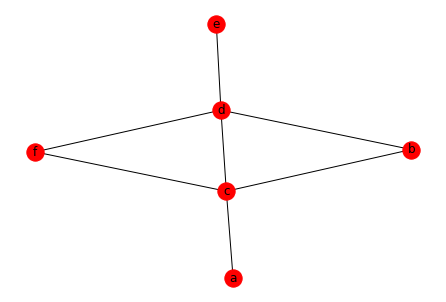

In [16]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(["a","b","c","d","e","f"])
G.add_edges_from([("a", "c"),
                  ("b", "c"),
                  ("b", "d"),
                  ("c", "d"),
                  ("c", "f"),
                  ("d", "e"),
                  ("d", "f"),
                 ])
nx.draw(G, with_labels=True, node_color="r")

In [30]:
print(f"common neighbors of `a` and `b`: {list(nx.common_neighbors(G, 'a', 'b'))}")
print(f"jaccard coefficients: {list(nx.jaccard_coefficient(G, ebunch=[['a', 'b']]))}")

common neighbors of `a` and `b`: ['c']
jaccard coefficients: [('a', 'b', 0.5)]


The Adamic-Adar index of `v_1` and `v_2` is defined as 
$$
    \sum_{u\in N(v_1)\cap N(v_2)}\frac{1}{log(k_u)}
$$
where $k_u$ represents the number of neighbors of `u`

For two nodes that are only connected via self-loops

In [34]:
print(f"Adamic-Adar index {list(nx.adamic_adar_index(G, [['a','b']]))})")

Adamic-Adar index [('a', 'b', 0.7213475204444817)])


### Global Neighborhood Overlap
#### Limitation of local features
![](figures/02-tradition-ml_34.jpeg)
#### Katz index
We can use the graph adjacencey matrix to compute the number of paths between two nodes.
![](figures/02-tradition-ml_35.jpeg)
![](figures/02-tradition-ml_36.jpeg)

In [2]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),
                  (1,4),
                  (2,4),
                  (3,4),
                 ])
nx.adj_matrix(G).toarray()

array([[0, 1, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0]])

![](figures/02-tradition-ml_37.jpeg)
![](figures/02-tradition-ml_38.jpeg)
![](figures/02-tradition-ml_39.jpeg)

In [12]:
A = nx.adj_matrix(G).todense()
beta = 0.1
n = A.shape[0]
S = np.linalg.inv(np.eye(n,n) - beta*A) - np.eye(n,n)
print(S)

[[0.02285774 0.11376683 0.01148106 0.11481056]
 [0.11376683 0.02285774 0.01148106 0.11481056]
 [0.01148106 0.01148106 0.01033295 0.10332951]
 [0.11481056 0.11481056 0.10332951 0.03329506]]


## Summary
![](figures/02-tradition-ml_40.jpeg)